# Problem Set - Applied Statistics

### Anna Sophia Maxen (dhv202)

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy as scp
from iminuit import Minuit, cost
from IPython.core.display import Latex

In [54]:
# General settings:
r = np.random                       # Random generator
r.seed(42)                          # Fixed order of random numbers

save_plots = False
verbose = True
N_verbose = 10


#### Problem 1

##### Problem 1.1

##### Problem 1.2

In [55]:
#defining the constant values
N = 365
l = 52.8
std = np.sqrt(l)

print(l + std)

60.06636084983398


In [56]:
def func_poisson_pmf(x, lamb):
    return scp.stats.poisson.pmf(x, lamb)

#survival function of a poisson distribution
def func_poisson_sf(x, lamb):
    return scp.stats.poisson.sf(x, lamb)

In [57]:


#a sigma is np.sqrt(lamb), but this constitutes 68% of the data. 
#We are interested in 60%, so that we can directly extract the  upper 20% of the data. 

desired_sigma = 30/np.sqrt(l)
#1 - 34.1
#x - 30

# figuring out which value from the distribution is the lower bound for the for the upper 20% of the distribution
threshold_value_busy_days = scp.stats.poisson.ppf(0.8, l)

# finding the survival function value at the threshold
sf_value_threshold = func_poisson_sf(threshold_value_busy_days, l)

print(f"Threshold value for upper 20%: {threshold_value_busy_days:.2f}")
print(f"Survival function value at threshold: {sf_value_threshold:.2f}")
# Calculate the corresponding number in the distribution with lambda = 52.8
corresponding_number = scp.stats.poisson.ppf(1 - sf_value_threshold, l)
#print(f"Corresponding number in the distribution: {corresponding_number}")

#Maximum customers:



#I do a cut-off at 3 sigma
upper_value_busy_days = scp.stats.poisson.ppf(0.999, l)
sf_value_upper = func_poisson_sf(upper_value_busy_days, l)
print(f"Upper value for 3 sigma: {upper_value_busy_days:.2f}")
print(f"Survival function value at upper value: {sf_value_upper:.2f}")

Threshold value for upper 20%: 59.00
Survival function value at threshold: 0.18
Upper value for 3 sigma: 77.00
Survival function value at upper value: 0.00


In [58]:
values = []
weights = []


#I want to calculate the average number of customers on a busy day
for i in range(int(upper_value_busy_days-threshold_value_busy_days)):
    values.append(i + threshold_value_busy_days)
    weights.append(func_poisson_pmf(i + threshold_value_busy_days, l))


mean_customers_busy = np.average(values, weights=weights)

print(f'The average number of customers on a busy day is: {mean_customers_busy:.2f}')

The average number of customers on a busy day is: 62.80


#### Problem 2

##### Problem 2.1

In [59]:
def weighted_mean(vals,sigs):
    values = np.array(vals)
    uncertainties = np.array(sigs)

    # Check if lengths match
    if len(values) != len(uncertainties):
        raise ValueError("Values and uncertainties must have the same length.")
    # Check for zero uncertainties to avoid division errors
    if np.any(uncertainties <= 0):
        raise ValueError("Uncertainties must be positive and non-zero.")

    # Calculate the weights
    weights = 1 / (uncertainties ** 2)
    # Calculate the weighted mean
    weighted_mean = np.sum(weights * values) / np.sum(weights)
    # Calculate the uncertainty of the weighted mean
    mean_uncertainty = np.sqrt(1 / np.sum(weights))
    
    return weighted_mean, mean_uncertainty

In [60]:
# Measurements in water

speed_of_sound = np.array([1532, 1458, 1499, 1394, 1432, 1565, 1474, 1440, 1507])
errors = np.array([67, 55, 74, 129, 84, 19, 10, 17, 14])

# Theoretical value
sos = 1481


In [61]:
#Naive average

naive_average_sos = np.mean(speed_of_sound)
naive_std_sos = np.sum(errors**2)/len(errors)

print(f'Naive: arithmetic mean and sum of quadrature of errors divided by number of errors: {naive_average_sos:.0f} +- {np.sqrt(naive_std_sos):.0f}')


#little bit less naive average

less_naive_average_sos = np.mean(speed_of_sound)
less_naive_std_sos = np.std(speed_of_sound, ddof=1)

print(f'Less naive: arithmetic mean and std: {less_naive_average_sos:.0f} +- {less_naive_std_sos:.0f}')

#least naive average, weighted mean

weighted_mean_sos, weighted_mean_uncertainty = weighted_mean(speed_of_sound, errors)

print(f'Weighted mean and errors on the weighted mean: {weighted_mean_sos:.0f} +- {weighted_mean_uncertainty:.0f}')

####here YOU HAVE TO THINK ABOUT YOUR ROUNDING

Naive: arithmetic mean and sum of quadrature of errors divided by number of errors: 1478 +- 65
Less naive: arithmetic mean and std: 1478 +- 53
Weighted mean and errors on the weighted mean: 1488 +- 7


In [62]:
#doing it for the first five, then the last four measurements

weighted_mean_sos_first, weighted_mean_uncertainty_first = weighted_mean(speed_of_sound[0:5], errors[0:5])

print(f'Weighted mean first five: {weighted_mean_sos_first:.2f} +- {weighted_mean_uncertainty_first:.2f}')

weighted_mean_sos_last, weighted_mean_uncertainty_last = weighted_mean(speed_of_sound[5:], errors[5:])

print(f'Weighted mean last four: {weighted_mean_sos_last:.2f} +- {weighted_mean_uncertainty_last:.2f}')

#combined weighted mean
combination_first_last = np.array([weighted_mean_sos_first, weighted_mean_sos_last])

combination_errors = np.array([weighted_mean_uncertainty_first, weighted_mean_uncertainty_last])

weighted_mean_sos_combined, weighted_mean_uncertainty_combined = weighted_mean(combination_first_last, combination_errors)

print(f'Weighted mean combined: {weighted_mean_sos_combined:.2f} +- {weighted_mean_uncertainty_combined:.2f}')
print(f'Theoretical value: {sos}')
print(f'Precision of the first five measurements: {np.abs(sos - weighted_mean_sos_first):.2f}')
print(f'Precision of the last four measurements: {np.abs(sos - weighted_mean_sos_last):.2f}')
print(f'Precision of the combined measurements: {np.abs(sos - weighted_mean_sos_combined):.2f}')

Weighted mean first five: 1475.53 +- 32.66
Weighted mean last four: 1488.19 +- 6.85
Weighted mean combined: 1487.66 +- 6.70
Theoretical value: 1481
Precision of the first five measurements: 5.47
Precision of the last four measurements: 7.19
Precision of the combined measurements: 6.66


Precision-wise the first five measurements give a value closer to the theoretical value. They have a very lousy accuracy though, with an error from the weighted mean of $\pm 32.66$.

Checking for consistency between the values:

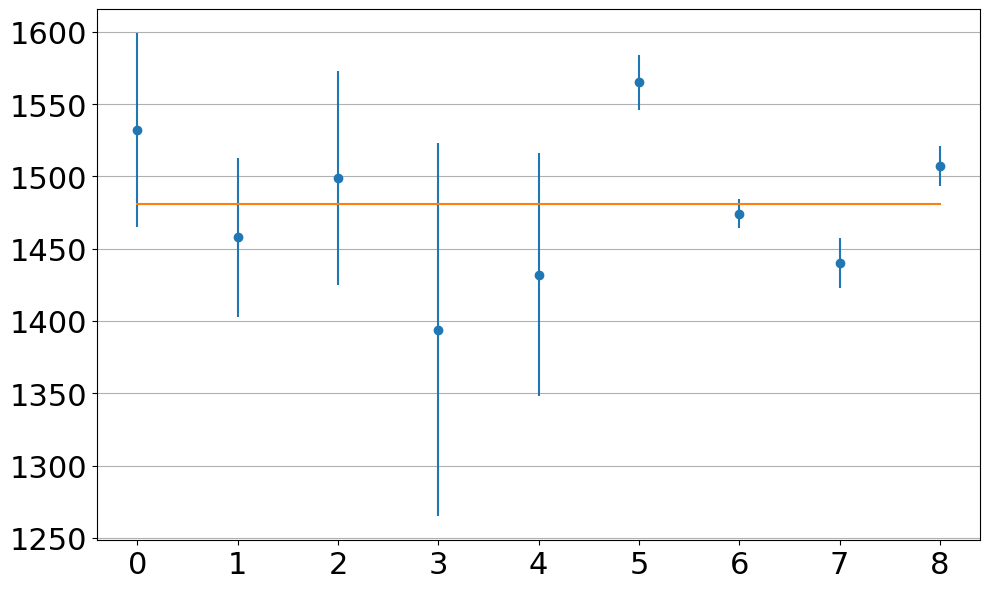

In [63]:
#check for consistency between the measurements
n = range(len(speed_of_sound))
x = np.linspace(1481, 1481, 9) 

plt.figure(figsize=(10, 6))

plt.errorbar(n, speed_of_sound, yerr=errors, fmt='o')

plt.plot(n, x)

plt.plot()

plt.tick_params(axis='both', which='major', labelsize=22)

plt.grid(axis='y')

plt.tight_layout()
#plt.savefig('pend_t_fit.png')

In [64]:
#Chauvenet's criterion, except it doesn't work for so few data points. Maybe I would take some of the points away more manually.

#new_sos = Chauvenets(speed_of_sound)


##### Problem 2.2

In [65]:
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

In [105]:
#defining the parameters

mu_A = 1.01
sigma_A = 0.19
mu_gamma = 0.12
sigma_gamma = 0.05
mu_omega = 0.47
sigma_omega = 0.06
t = 1

#Doing latex magic
A, gamma, omega, time = symbols("A, gamma, omega, t")
dA, dgamma, domega, dtime = symbols("sigma_A, sigma_gamma, sigma_omega, sigma_t")
dx_A,dx_gamma,dx_omega = symbols("sigma_x^A,sigma_x^gamme,sigma_x^omega")
    
# Define relation, and print:
x_af_t = A * exp(-time * gamma) * cos(omega * time)
lprint(latex(Eq(symbols('x_af_t'),x_af_t)))
    
# Calculate uncertainty and print:
dx_af_t = sqrt(x_af_t.diff(A)**2 * dA**2 + x_af_t.diff(gamma)**2 * dgamma**2 + x_af_t.diff(omega)**2 * domega**2)
dx_A = sqrt(x_af_t.diff(A)**2 * dA**2)
dx_gamma = sqrt(x_af_t.diff(gamma)**2 * dgamma**2)
dx_omega = sqrt(x_af_t.diff(omega)**2 * domega**2)

lprint(latex(Eq(symbols('sigma_x_(t)'), dx_af_t)))
lprint(latex(Eq(symbols('sigma_x^A'), dx_A)))
lprint(latex(Eq(symbols('sigma_x^gamma'), dx_gamma)))
lprint(latex(Eq(symbols('sigma_x^omega'), dx_omega)))
    
# Turn expression into numerical functions 
fx_af_t = lambdify((A, gamma, omega, time),x_af_t)
fdx_af_t = lambdify((A,dA,gamma, dgamma, omega, domega, time, dtime),dx_af_t)
    
# Define values and their errors
vA, vdA = mu_A, sigma_A
vgamma, vdgamma = mu_gamma, sigma_gamma
vomega, vdomega = mu_omega, sigma_omega
vt, vdt = t, 0

    
# Numerically evaluate expressions and print 
vx_af_t = fx_af_t(vA, vgamma, vomega, vt)
vdx_af_t = fdx_af_t(vA, vdA, vgamma, vgamma, vomega, vdomega, vt, vdt)
lprint(fr'x(t) = ({vx_af_t:.4f} \pm {vdx_af_t:.4f})')
lprint(fr'A = ({vA:.4f} \pm {vdA:.4f})')
lprint(fr'gamma = ({vgamma:.4f} \pm {vdgamma:.4f})')
lprint(fr'omega = ({vomega:.4f} \pm {vdomega:.4f})')




<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [106]:

print(f'The value of the function at t=1 is: {vx_af_t:.2f} +- {vdx_af_t:.2f}')



The value of the function at t=1 is: 0.80 +- 0.18


In [112]:

mu_A = 1.01
sigma_A = 0.19
mu_gamma = 0.12
sigma_gamma = 0.05
mu_omega = 0.47
sigma_omega = 0.06
t = 1

times = np.linspace(0, 30, 100)

A_s = np.zeros(len(times))
gamma_s = np.zeros(len(times))
omega_s = np.zeros(len(times))

for i in range(len(times)):
    A_s[i] = dx_A.subs({A: mu_A, dA: sigma_A, gamma: mu_gamma, dgamma: sigma_gamma, omega: mu_omega, domega: sigma_omega, time: times[i]})
    gamma_s[i] = dx_gamma.subs({A: mu_A, dA: sigma_A, gamma: mu_gamma, dgamma: sigma_gamma, omega: mu_omega, domega: sigma_omega, time: times[i]})
    omega_s[i] = dx_omega.subs({A: mu_A, dA: sigma_A, gamma: mu_gamma, dgamma: sigma_gamma, omega: mu_omega, domega: sigma_omega, time: times[i]})

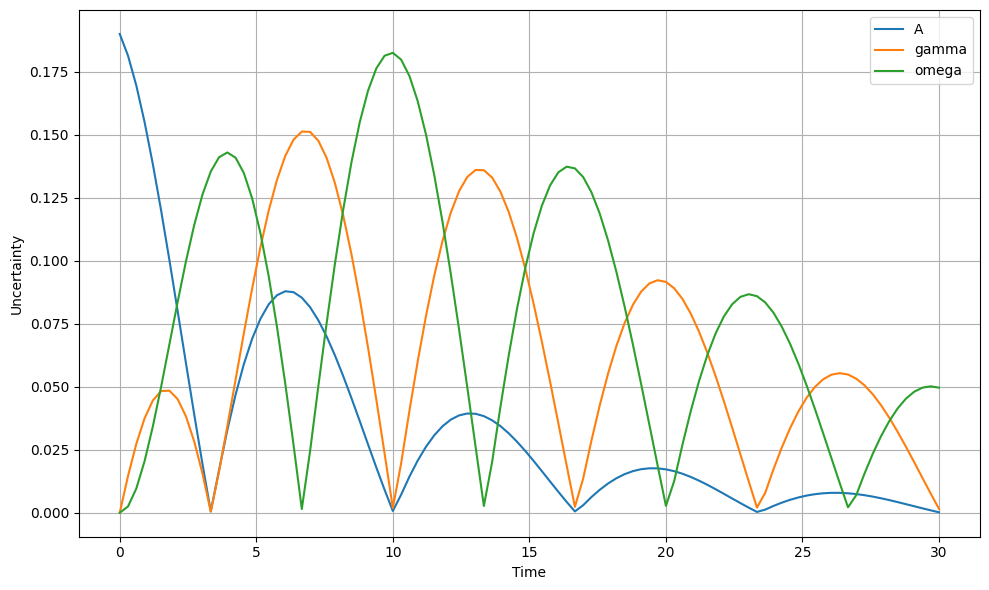

In [113]:
#now we want to plot the different uncertainties as a function of time

plt.figure(figsize=(10, 6))
plt.plot(times, A_s, label='A')
plt.plot(times, gamma_s, label='gamma')
plt.plot(times, omega_s, label='omega')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Uncertainty')
plt.grid()
plt.tight_layout()
plt.show()

#### Problem 3

##### Problem 3.1

In [115]:
def probability_of_scoring(aim):
    if np.abs(aim) < 4:
        p = np.abs(aim)/4
    elif np.abs(aim) >= 4:
        p = 0
    return p

def uncertainty_of_aim(aim):
    return 1

print(f'The probability of scoring a goal is: {probability_of_scoring(2.5):.2f} +- {uncertainty_of_aim(2.5):.2f}')

The probability of scoring a goal is: 0.62 +- 1.00


In [159]:
border = 4

def gauss_of_shot(aim, border):
    return (scp.stats.norm.cdf(border, aim, 1) - scp.stats.norm.cdf(-border, aim, 1))*probability_of_scoring(aim)

In [171]:
p = gauss_of_shot(0.3, border)
print(p)

0.07499127452707886
